<a href="https://colab.research.google.com/github/mmaloba117/assignment/blob/master/SIT720_218019242_Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:#0b486b">SIT 720 - Machine Learning</span>

---
Lecturer:   Chandan Karmakar     | karmakar@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3125, Australia.

## Assessment 1

**Objective**
In this assignment, you need to demonstrate your skills for data clustering and dimensionality reduction. There are two parts of this assignment.

### Part-1 (Clustering):
Download the digit dataset from the unit site. This dataset contains 8x8 pixel images of digits 0-9. There are five different files where each file contains different number and types of digit images.  The file name ends with a digit between 0 to 4. Please compute the modulus operation (fID=SID % 5), where SID is your own student ID number. Now select the data file, name of which ends with the same fID value. For example, if your student id is 218201419, then you should compute fID=218201419%5. This will result as fID=4. So in this case you should download the file named "digitData4.csv'.

1- Read the downloaded file into a matrix M(mXn). Create an empty numpy array X with m rows and n-1 columns. Assign all m rows and first n-1 columns of M into X. Create a numpy vector trueLabels and assign n-th column of M into that. Print dimensions of M, X and trueLabels. **(1+1+1+1+1=5 marks)**

2- Next perform K-means clustering with 5 clusters using **Euclidean distance** as similarity measure. Evaluate the clustering performance using adjusted rand index (ARI) and adjusted mutual information. Report the clustering performance averaged over 50 random initializations of K-means. **(1+1+3=5 marks)**

3- If we have an ARI value of 0.7 after a single run of K-means clustering with 'Kmeans++' initializaton for any data set then what will be the value of averaged ARI over 20 repeatations. Explain why? **(1+1=2 marks)**   

4- Repeat K-means clustering with 5 clusters using a similarity measure other than **Euclidean distance** (you are free to use other libraries). Evaluate the clustering performance over 50 random initializations of K-means using adjusted rand index and adjusted mutual information. Report the clustering performance and compare it with the results obtained in step 2. **(2+1+2=5 marks)**   

### Part-2 (Dimensionality Reduction using PCA/SVD):
For the provided digits dataset:

1- Perform PCA. Plot the captured variance with respect to increasing latent dimensionality. What is the minimum dimension that captures at least 95% variance? **(1+2+2=5 marks)** 

2- Create a scatter plot with each of the total rows of X projected onto the first two principal components. In other words, the horizontal axis should be v1, the vertical axis v2, and each individual should be projected onto the subspace spanned by v1 and v2. Your plot must use a different color for each digit and include a legend. **(2+1=3 marks)** 


In [1]:
fID=218019242%5
fID

2

**Part-1 (Clustering):**

In [0]:
import numpy as np

In [3]:
#Importing Datadigit2.csv file 
url ='https://github.com/mmaloba117/assignment/blob/master/digitData2.csv?raw=true'
M = np.genfromtxt(url, delimiter=",")
print (M.shape)

(1528, 65)


In [0]:
#Creating empty array X and assigning M into X
X= np.empty([M.shape[0],M.shape[1]-1])
X= M[:,0:M.shape[1]-1]

In [5]:
# Creating a numpy vector trueLabels
trueLabels = np.empty([M.shape[0],1])
trueLabels = M[:,-1]

print(X.shape)
print(M.shape)
print(trueLabels.shape)

(1528, 64)
(1528, 65)
(1528,)


In [6]:
#K-means clustering with 5 clusters using Euclidean distance

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

nums = range(1,50)
ari=[]
ami=[]

for i in nums:

  KM= KMeans(n_clusters=5, random_state=0).fit(M)
  centroids = KM.cluster_centers_
  predlabel = KM.labels_
  
# Evaluate Clustering performance using Adjusted rand index and Adjusted mutual information 
  ari= adjusted_rand_score(trueLabels, predlabel)
  ami= adjusted_mutual_info_score(trueLabels, predlabel)
  

AVAri= np.mean(np.array(ari))
AVAmi= np.mean(np.array(ami))
print(AVAri)
print(AVAmi)

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.3965002310741046
0.49949149802603565


In [7]:
# Using Cosine similarity to evaluate performance of K-Means Clustering 

from sklearn import preprocessing, decomposition
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn import cluster
from nltk.cluster.kmeans import KMeansClusterer
import nltk

NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(M, assign_clusters=True)
print (assigned_clusters)


nums1 = range(1,50)
ari1=[]
ami1=[]


for i in nums1:
  
  kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
  kmeans.fit(M)
  centroids = kmeans.cluster_centers_
  predlabel1 = kmeans.labels_
  
  
  #Evaluate clustering performance using Adjusted rand Index and Adjusted mutual Information
ari1 = metrics.adjusted_rand_score(trueLabels, predlabel1)
ami1= metrics.adjusted_mutual_info_score(trueLabels, predlabel1)

AVAri1= np.mean(np.array(ari1))
AVAmi1= np.mean(np.array(ami1))
print(AVAri1)
print(AVAmi1)




[2, 3, 3, 4, 1, 4, 2, 0, 4, 4, 2, 1, 3, 4, 1, 0, 3, 0, 0, 4, 2, 1, 3, 4, 1, 0, 2, 1, 3, 4, 2, 4, 0, 0, 2, 0, 2, 4, 0, 4, 3, 1, 1, 0, 0, 4, 0, 1, 2, 2, 3, 1, 0, 0, 1, 2, 1, 3, 2, 4, 4, 0, 4, 4, 1, 2, 2, 2, 1, 0, 1, 0, 2, 4, 4, 1, 3, 1, 2, 2, 1, 0, 2, 4, 3, 1, 0, 1, 2, 4, 1, 4, 4, 1, 0, 3, 0, 1, 4, 3, 1, 2, 0, 0, 2, 4, 3, 1, 0, 0, 1, 1, 0, 3, 3, 3, 3, 0, 0, 4, 0, 1, 3, 3, 1, 4, 2, 0, 4, 3, 2, 1, 3, 0, 1, 0, 2, 0, 3, 4, 2, 1, 3, 4, 1, 0, 2, 0, 3, 4, 2, 1, 3, 4, 1, 0, 2, 0, 3, 4, 2, 4, 0, 0, 2, 0, 2, 4, 3, 4, 3, 1, 1, 0, 0, 4, 0, 1, 2, 2, 3, 3, 0, 3, 3, 2, 1, 3, 2, 4, 4, 0, 4, 4, 1, 2, 2, 2, 1, 4, 1, 0, 2, 4, 0, 3, 3, 3, 2, 2, 1, 0, 2, 4, 3, 1, 0, 4, 1, 4, 4, 1, 0, 2, 4, 1, 0, 1, 1, 2, 0, 0, 2, 4, 2, 1, 0, 0, 1, 1, 0, 3, 3, 3, 3, 0, 0, 1, 3, 3, 1, 4, 2, 3, 4, 3, 2, 3, 3, 4, 1, 4, 2, 0, 4, 0, 2, 1, 3, 4, 1, 0, 2, 0, 0, 0, 2, 1, 3, 4, 1, 4, 2, 0, 0, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 0, 1, 3, 0, 0, 4, 4, 3, 2, 2, 3, 3, 0, 4, 3, 2, 1, 3, 2, 4, 4, 0, 4, 4, 1, 2, 2, 2, 2, 0, 3, 0, 2, 0, 4, 3, 4, 

Part-2 (Dimensionality Reduction using PCA/SVD):

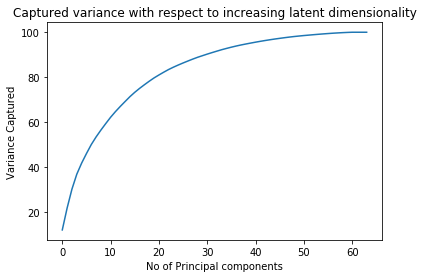

minimum dimensions that capture 95% variance


40

In [8]:
#PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib.mlab import PCA

# Data Transformation 
Xtransform = preprocessing.scale(X)

# Apply PCA

samples, dims =Xtransform.shape

pca = decomposition.PCA(n_components=dims).fit(Xtransform) 

var = pca.explained_variance_ratio_
varcumsum = np.cumsum(np.round(var,decimals=4)*100)
plt.plot(varcumsum)
plt.title('Captured variance with respect to increasing latent dimensionality')
plt.xlabel("No of Principal components")
plt.ylabel("Variance Captured")
plt.show()
  
Dim95 = decomposition.PCA(n_components=0.95).fit(Xtransform) # pca that captures 95% variance 
minidim = len(Dim95.explained_variance_ratio_) # No of min dimensions that captures 95% variance 
print('minimum dimensions that capture 95% variance')
(minidim)

[[  1.64658433  18.83668238]
 [ -9.79651975 -19.46495236]
 [ -8.16927002  -9.29638607]
 ...
 [-27.41459175   0.77614215]
 [-19.65804536  -6.66473282]
 [ -2.44682437 -17.455694  ]]


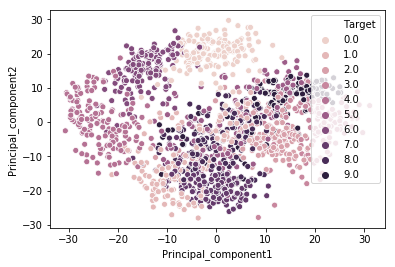

In [11]:
#scatter plot of the first two principal components of X

from sklearn.decomposition import PCA
import pandas as pd 
import seaborn as sns

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X)
print(principalComponents)

#Data Frame of the first two principal componenets
principalDf=pd.DataFrame(data=principalComponents, columns=['Principal_component1', 'Principal_component2'])

# Identifying the uique values of the truelabel
target=trueLabels
principalDf.head()
principalDf['Target']=target
len(principalDf['Target'].unique())

#Scatter Plot of 2 main principal components with truelabels (colour)
sns.scatterplot(data=principalDf, x='Principal_component1', y='Principal_component2', hue='Target', legend="full")




In [0]:
Norm_M = preprocessing.normalize(M) # normalise value of M
Norm_M = preprocessing.normalize(M) # normalise value of M

nums1 = range(1,50)
ari1=[]
ami1=[]

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
for i in nums1:
    
  kmeans.fit(Norm_M)
  centroids = kclusterer.cluster_centers_
  predlabel1 = kclusterer.labels_




#Evaluate clustering performance using Adjusted rand Index and Adjusted mutual Information

ari1= adjusted_rand_score(trueLabels, predlabel1)
ami1= adjusted_mutual_info_score(trueLabels, predlabel1)

AVAri1= np.mean(np.array(ari1))
AVAmi1= np.mean(np.array(ami1))
print(AVAri1)
print(AVAmi1)

In [0]:
#Clutering Performance Average over 50 iterations

print('Average adjusted rand index:{}'. format(ari.mean()))
print('Average adjusted mutual information:{}'. format(ami.mean()))

best initialization is-still the unique on regardless of the repetitions